<h1>Конспект по SMT</h1>

*Конспект выполнен на основе работы О.В. Митрениной “Машинный перевод” и материалов, представленных на семинаре.*

*Митренина О. В. Машинный перевод // Прикладная и компьютерная лингвистика. М.: Ленанд, 2017.*

<h2>Кратко о принципе работы</h2>

**SMT (statistical machine translation)** — статистический машинный перевод. Работает на основе методов машинного обучения, без словаря и грамматики.

В основе лежат параллельные корпуса, где есть большое количество предложений и их переводов. Машина запоминает, как переводились биграммы/триграммы, а позже высчитывает вероятность перевода предложения, выбирает самый подходящий вариант в зависимости от того, насколько сильно вероятность перевода стремится к единице.

<h2>Подробнее об SMT</h2>

Допустим, Х — предложение на исходном языке. Y — предложение в конечном языке. Машине нужно вычислить, какое предложение Y с наибольшей вероятностью подходит в качестве перевода к предложению Х. Вероятность записывается так:  P(Y|X).

Чтобы выбрать наиболее вероятное предложение-перевод Y из всех возможных для X, необходимо максимизировать P(Y|X). В виде формулы это выглядит так: **argmax P(Y|X)**. Эта же формула может быть записана в виде **теоремы Байеса**, которая “позволяет предсказать некое событие с определенной степенью вероятности на основе предварительных (априорных) знаний или условий, относящихся к нему”. Формула выглядит так: **P(Y|X) = ( P(X|Y) P(Y) ) / P(X)**. В ней:

P(Y|X) — вероятность события Y, когда событие X произошло
P(X|Y) — вероятность события X, когда событие Y произошло (условная вероятность; вероятность того, что Y соответствует X в параллельном корпусе)
P(Y) — априорная вероятность события Y (вероятность встречи Y до учета экспериментальных знаний)
P(X) — априорная вероятность события X.


Если упростить формулу, убрав из неё знаменатель (он является постоянной величиной и не влияет на максимальное значение вероятностной формулы), получится:  arg max у P(y|x) = arg max у P(y) × P(x|y), где:


- **P(Y)** — вероятность появления предложения Y в языке, вычисляется с помощью **модели языка**. Отвечает за связность, т.е. показывает, что предложение Y допустимо в языке.


- **P(X|Y)**  — это вероятность того, что конечное предложение Y можно перевести с помощью исходного предложения X (другими словами: что Y соответствует X в параллельном корпусе). Вычисляется с помощью **модели перевода**. Отвечает за правдоподобность перевода.


И связность, и правдоподобие являются важными компонентами хорошего перевода.

<h2>Подробнее о модели языка (language model)</h2>

Языковая модель помогает вычислить вероятность для всех теоретически возможных предложений языка, для чего необходим корпус текстов. 

Допустим, V — множество всех словоформ корпуса. Предложение в тексте — цепочки слов из множества V. (+Должно быть обозначение конца предложения в виде символа/слова). Каждому предложению, составленному из слов множества V, необходимо приписать некоторую вероятность: для этого делим кол-во раз, сколько встретилось предложение в тексте, на общее число предложений. При этом если предложение не встретилось в тексте ни разу, вероятность будет нулевой. Чтобы оценить вероятность предложений, которые не встретились в корпусе, надо анализировать сочетания слов.

Допустим, перед словом Xn идут слова X1, X2, X2, X4,... Xn-1. Чтобы рассчитать вероятность слова Xn, надо действовать по формуле:

P(Xn | X1, X2, X2, X4,... Xn-1)

Таким образом можно вычислить условную вероятность для каждого слова, а потом перемножить их между собой → мы получим вероятность любого предложения. В чём минус этого способа? В том, что некоторые длинные цепочки всё равно могут не встретиться, даже если корпус очень велик.

Какова альтернатива? 

**Цепи Маркова**, статистические модели. Этот подход позволяет опираться не на всю цепочку слов в предложении, а только на два-три предшествующих слова. Самые популярные — цепи Маркова первого и второго порядков, хотя они могут быть и сложнее.

Цепь Маркова первого порядка высчитывает одно предыдущее событие. Вероятность предложения высчитывается следующим образом: вероятность первого слова (P(X1)) умножается на вероятность второго слова при условии наличия первого слова (P(X2 | X1)), затем всё умножается на вероятность третьего слова при условии наличия второго слова (P(X3 | X2)) и т.д. до последнего слова. Формула:

__Р(X1, X2, X3…. Xn) = P(X1) * P(X2 | X1) * P (X3 | X2) … * P (Xn | Xn-1)__

Важно, чтобы была проведена **оценка максимального правдоподобия** (далее ОМП). В её основе вновь какая-то очень сложная математика =(, которую я не запомню, поэтому напишу просто, что этот подход не самый лучший, т.к. если каких-то сочетаний (которые в теории возможны!) не встретится в корпусе, то вероятность их появления будет равна нулю. Чтобы эту проблему устранить, используются **методы сглаживания**. Если используется **линейная интерполяция**, то ОМП проводится на основе триграмм, биграмм и униграмм, заимствуя от каждой из них часть вероятности. Тогда, если хотя бы часть какой-то триграммы встретилась в корпусе, то ОМП будет не равна нулю.

**Метод дисконтирования** учитывает, что для тех сочетаний, что вообще не встретились в корпусе, зарезервирована какая-то вероятность.  

<h2>Подробнее о модели перевода</h2>

Модель перевода позволяет оценить вероятность того, что одно предложение является переводом другого (p(x|у)).

Для создания этой модели нужны параллельные корпуса: в них между словами (необязательно между словами, но чаще всего именно так) исходных предложений должны быть проведены связи со словами из предложений конечного языка. Это называется **выравниванием**. Пример:

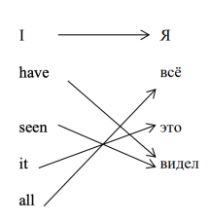

Mapping = картирование = сопоставлений элементов данных между двумя отдельными моделями данных. Картирование X на Y производится по формуле a : X → Y
Результат картирования (mapping):

a : {1 → 1, 2 → 2, 3 → 2, 4 → 3}

Пример:

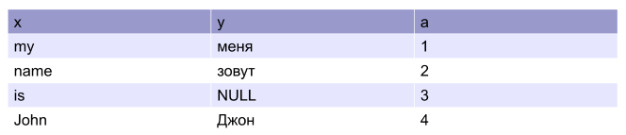

Чтобы матрица была одного размера, можно ввести нули.

Выравнивание, к счастью, часто автоматизированное.  Например, в пословном выравнивании параллельных корпусов на помощь приходит программа GIZA++, которая основана на моделях IBM. 

<h2>IBM</h2>

Модели перевода, основанные на словах = wordbased translation models. IBM — компания, использовавшая этот подход. Имеет 5 моделей для статистического моделирования выравнивания и перевода. 

При работе IBM1 создаётся заготовка для длины lenX, после выводится вектор для выравнивания, а далее генерируется перевод путем сопоставления с обученным представлением

<h2>Дополнение: модели перевода, основанные на сочетаниях</h2>

Сочетания = фрагменты предложений, не имеющие единой структуры. 

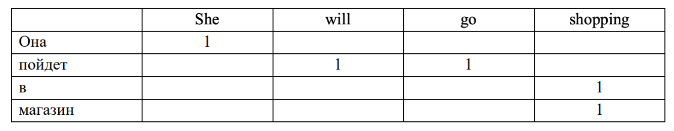

Пример матрицы выравнивания.

<h2>Дополнение с семинара</h2>

**Компоненты модели SMT (как это программировать → код):**

1. ***N-граммная языковая модель*** - моделируем *вероятностное распределение* конструкций на уровне слов или фраз в языке Y
2. ***Модель перевода (t-model)*** - собираем *статистику* соотвествий фраз в паралелльном корпусе, ищем переводческие соответствия X - Y и моделируем их с помощью теории *вероятности*:
  1. Допускаем, что любое предложение языка Y может быть "искаженной" версией некой фразы на языке X
  2. Ищем наиболее правдоподобные соответствия X - Y
3. ***Декодер*** - ищем наиболее грамматичные и лексически правдоподобные результаты, отбираем среди *гипотез* один результат